In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'traffic-signs-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F545505%2F1000084%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240511%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240511T134108Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3e4f2008472ec2a94f1229b0de22fffd7bdb8f30949553bb033ca8a3d11c83e3546841e43d0596fd8fdccc756fe8966b35af51b15ec20d77799b03bd55f3fdc7d1fbf9214bb0f2ed9efe82d3cf4b8a1332e665e70fbded9466ab93c407c8af3db1387d17e87b404dbc5736d4081cae419b395a16fb04615fc2cef481007f0d89d44864ceac3fa3a4a378c04612f65fddfedc3f7b7f184c8b63414ba295d0fc87441512f5b08096595f8a287739f5ab85912765dfd9c0fe14976f6f380a15b92dbc836306ce138e0ee9c56d1b39d658a4a3d4c10d3f225ab341e5d97a21f46e1608c03fbf46397a5d19279920a165b0a5689c9ab1e2de83bb3861dab3387a743c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 68679820 bytes downloaded
Downloaded and uncompressed: traffic-signs-classification
Data source import complete.


In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
labels=pd.read_csv("../input/traffic-signs-classification/labels.csv")
labels.head(45)

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [5]:
dic={}
for i in range(labels.shape[0]):
    dic[i]=labels.iloc[i]['Name']

In [6]:
print(dic)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vechiles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vechiles', 16: 'Vechiles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

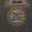

In [7]:
from PIL import Image
im = Image.open('../input/traffic-signs-classification/myData/0/00000_00000.jpg')
im

In [8]:
im.size

(32, 32)

In [9]:
from keras.preprocessing import image
x=[]
y=[]
for dirs in os.listdir('../input/traffic-signs-classification/myData'):
    for files in os.listdir("../input/traffic-signs-classification/myData/"+dirs):
        sign_img = np.array(image.load_img("../input/traffic-signs-classification/myData/"+dirs+"/"+files,target_size = (32,32)))
        x.append(sign_img)
        y.append(int(dirs))

In [10]:
from sklearn.utils import shuffle
x_shuffled, y_shuffled = shuffle(x, y)


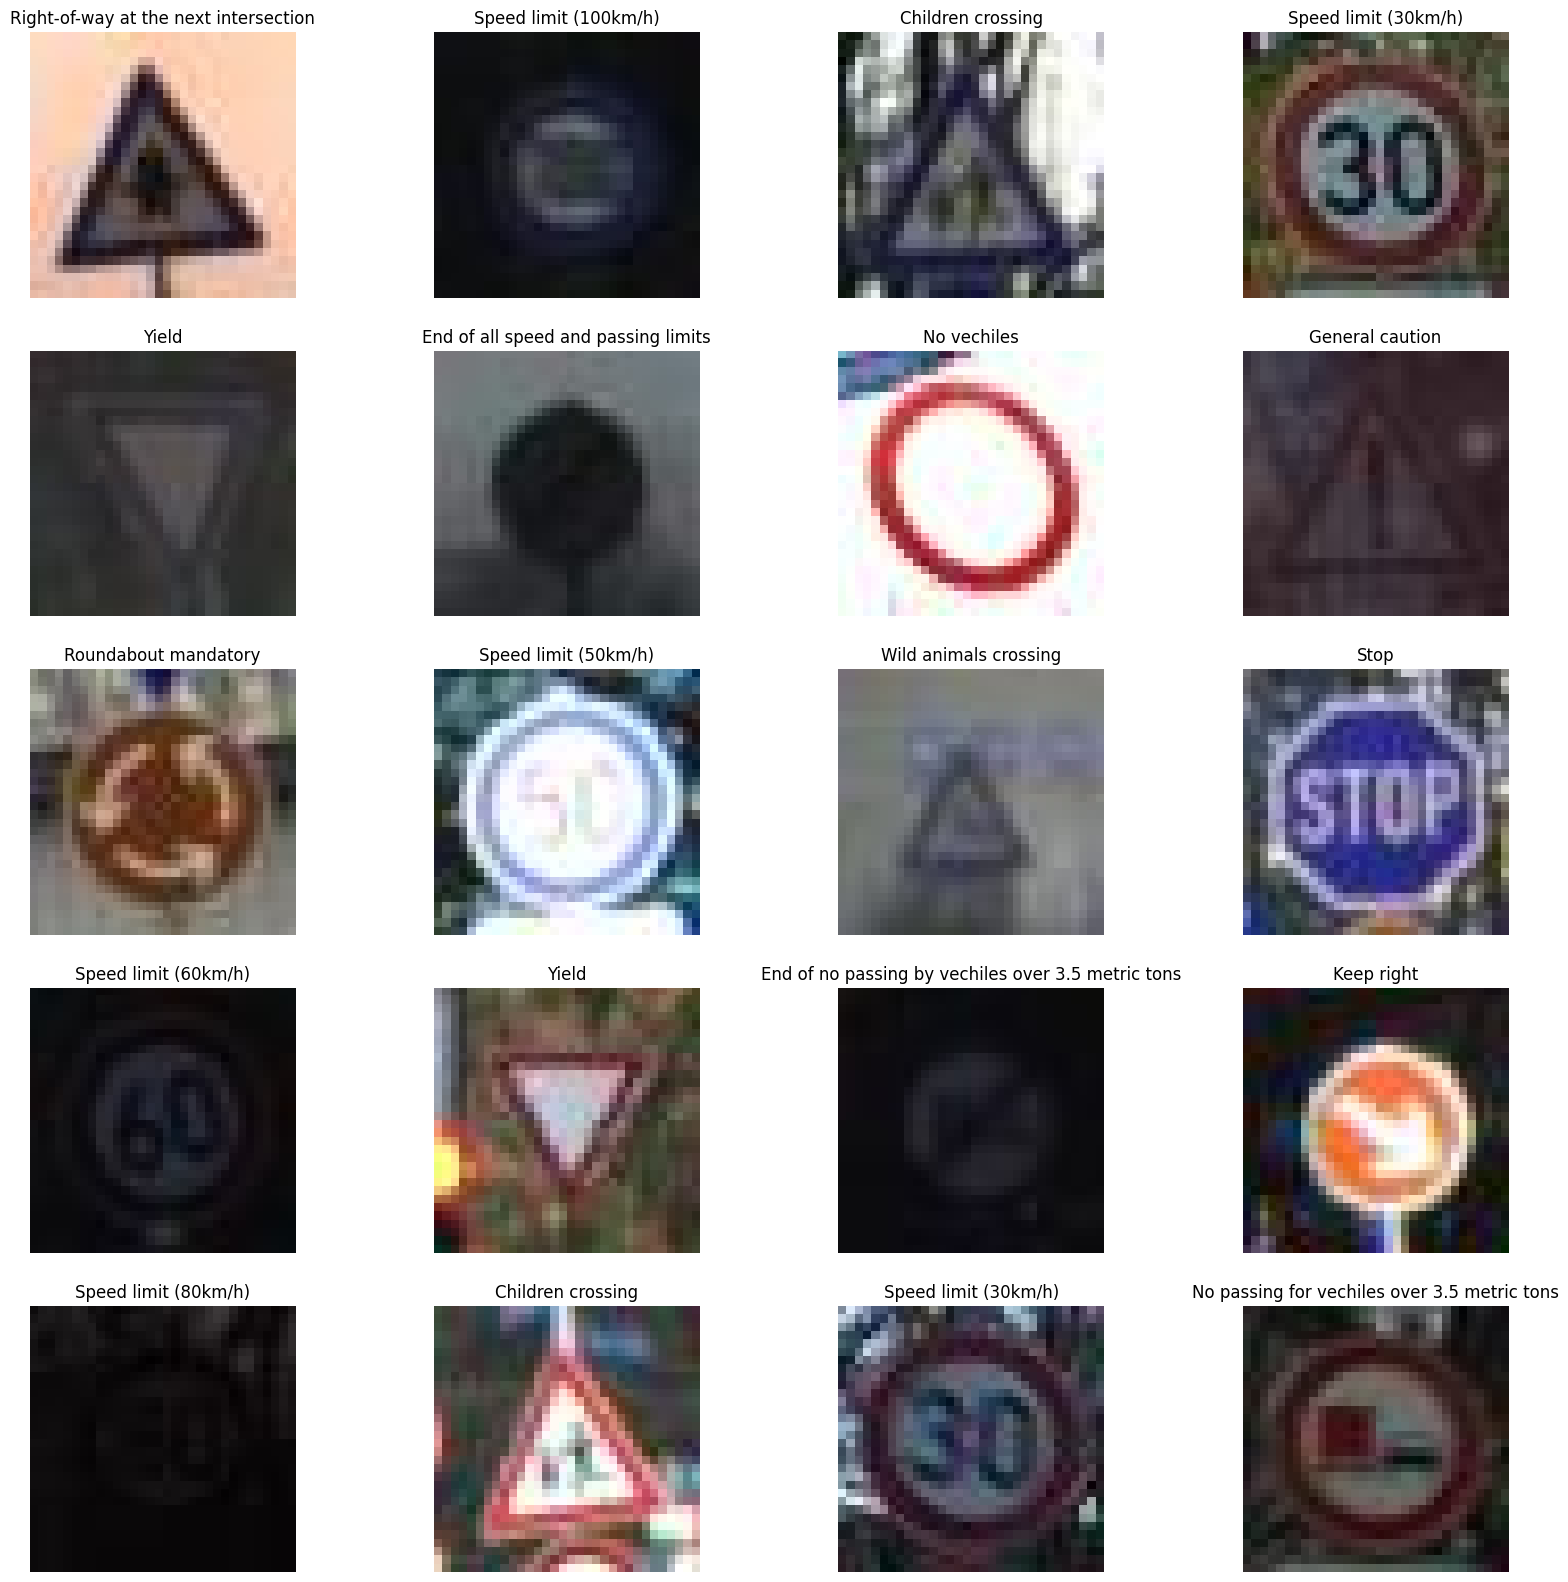

In [11]:
import matplotlib.pyplot as plt
def plot_image(x,y, index):
    image = plt.imshow(x[index])
    l=plt.title(dic[y[index]])
    ax.grid(False)
    ax.axis('off')
    return image, l
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_image(x_shuffled,y_shuffled, i)

plt.show()

In [12]:
x_shuffled[0].shape

(32, 32, 3)

In [13]:
len(y_shuffled)

73139

In [14]:
import keras
y_categorical = keras.utils.to_categorical(y_shuffled, 43)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_rest,y_train,y_rest=train_test_split(x_shuffled,y_categorical,test_size=0.1)

In [16]:
x_test,x_val,y_test,y_val=train_test_split(x_rest,y_rest,test_size=0.5)

In [17]:
len(x_train),len(y_train)

(65825, 65825)

In [18]:
len(x_test),len(y_test)

(3657, 3657)

In [19]:
len(x_val),len(y_val)

(3657, 3657)

In [20]:
from tensorflow.keras.applications.resnet import ResNet50
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD, RMSprop
import keras
import tensorflow as tf

In [21]:
x_train_array=np.array(x_train)
y_train_array=np.array(y_train)
x_train_scaled=x_train_array/255.0

In [22]:
x_val_array=np.array(x_val)
y_val_array=np.array(y_val)
x_val_scaled=x_val_array/1.0
x_val_scaled=x_val_scaled/255


In [23]:
x_test_array=np.array(x_test)
x_test_scaled=x_test_array/255.0

In [24]:
y_test_array=np.array(y_test)

In [25]:
resnet_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (32,32,3))

In [26]:
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation= 'softmax')(x)
model2 = Model(inputs = resnet_model.input, outputs = predictions)

In [27]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=3
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [34]:
history =  model2.fit(x_train_scaled, y_train_array,validation_data = (x_val_scaled, y_val_array), batch_size =250, epochs =1, verbose = 1, callbacks = [stop, checkpoint])

264/264 [==============================] - 3843s 15s/step - loss: 3.4693 - accuracy: 0.0967 - val_loss: 3.2928 - val_accuracy: 0.1146


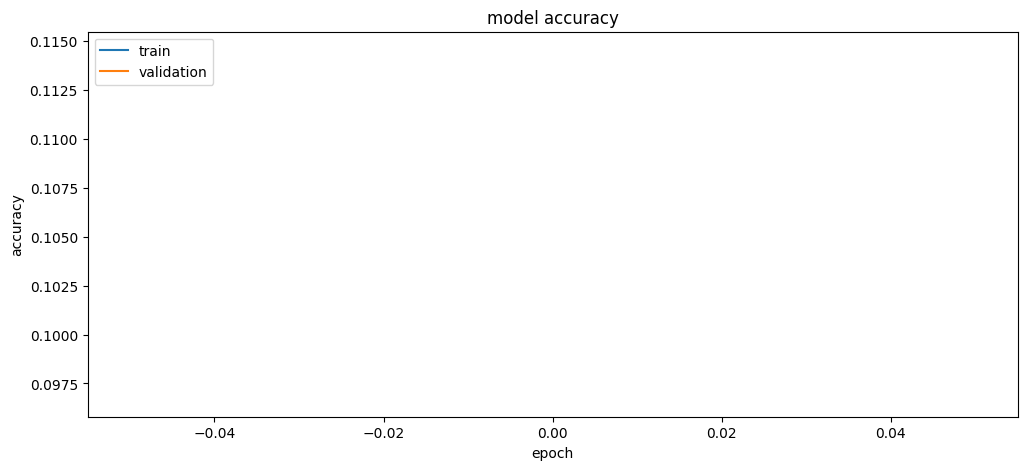

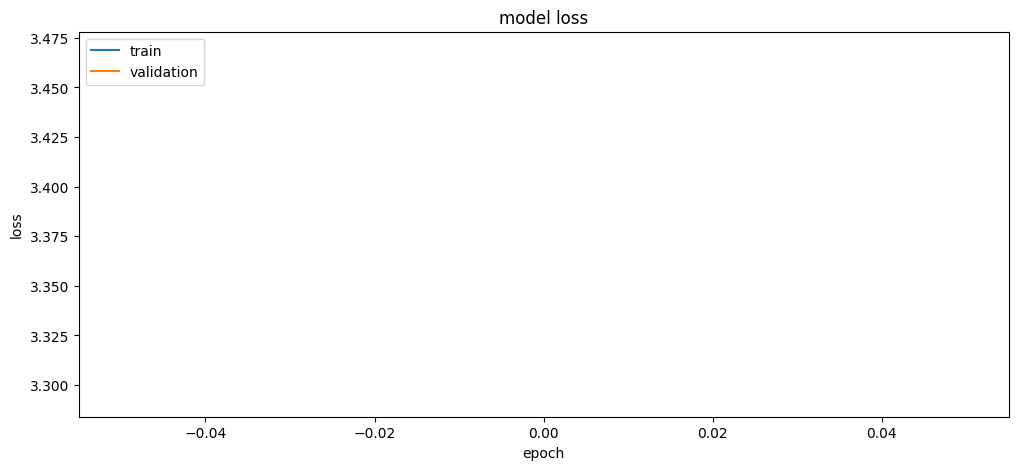

In [38]:
plt.figure(figsize=(12, 5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.figure(figsize=(12, 5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [39]:
pred2 = np.argmax(model2.predict(x_test_scaled), axis = 1)

115/115 [==============================] - 16s 130ms/step


In [40]:
actual=np.argmax(y_test_array, axis = 1)

In [41]:
pred2

array([ 1,  5,  5, ..., 12, 12, 13])

In [42]:
actual

array([30, 10, 23, ...,  3, 22,  9])

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
labels = [dic[i] for i in range(43)]
print(classification_report(actual, pred2, target_names = labels))

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.00      0.00      0.00        27
                              Speed limit (30km/h)       0.15      0.50      0.23       264
                              Speed limit (50km/h)       0.00      0.00      0.00       131
                              Speed limit (60km/h)       0.23      0.07      0.11       139
                              Speed limit (70km/h)       0.11      0.03      0.04       185
                              Speed limit (80km/h)       0.07      0.19      0.10       150
                       End of speed limit (80km/h)       0.00      0.00      0.00        34
                             Speed limit (100km/h)       0.12      0.03      0.04       146
                             Speed limit (120km/h)       0.00      0.00      0.00       138
                                        No passing       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
loss, acc = model2.evaluate(x_test_scaled, y_test_array)
print('Accuracy: ', acc, '\nLoss    : ', loss)

115/115 [==============================] - 15s 130ms/step - loss: 3.3063 - accuracy: 0.1184
Accuracy:  0.11840306222438812 
Loss    :  3.3062615394592285


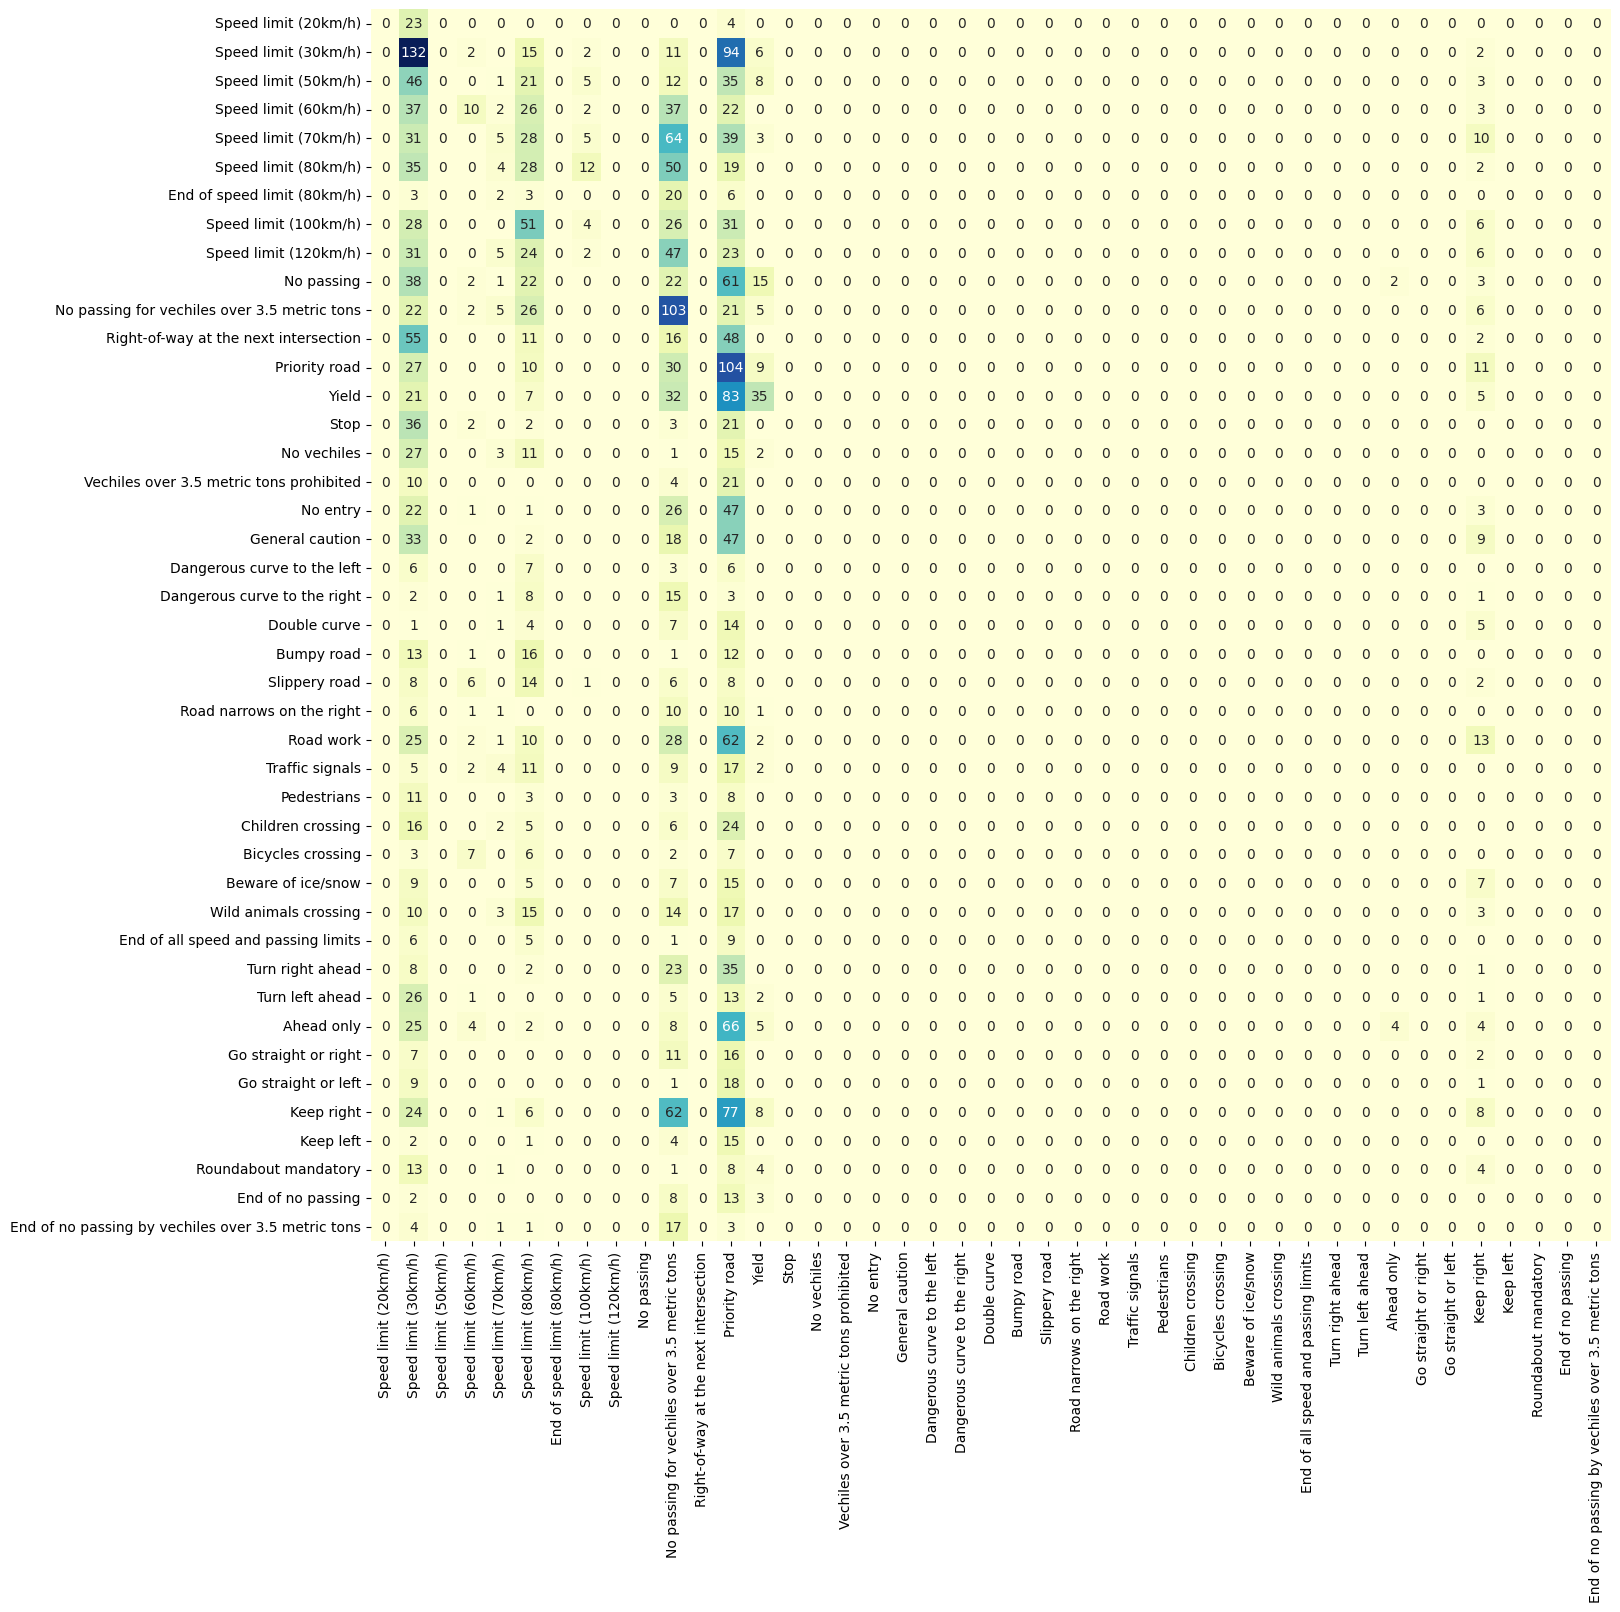

In [45]:
import seaborn as sns
cmat = confusion_matrix(actual, pred2)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=labels, yticklabels=labels);

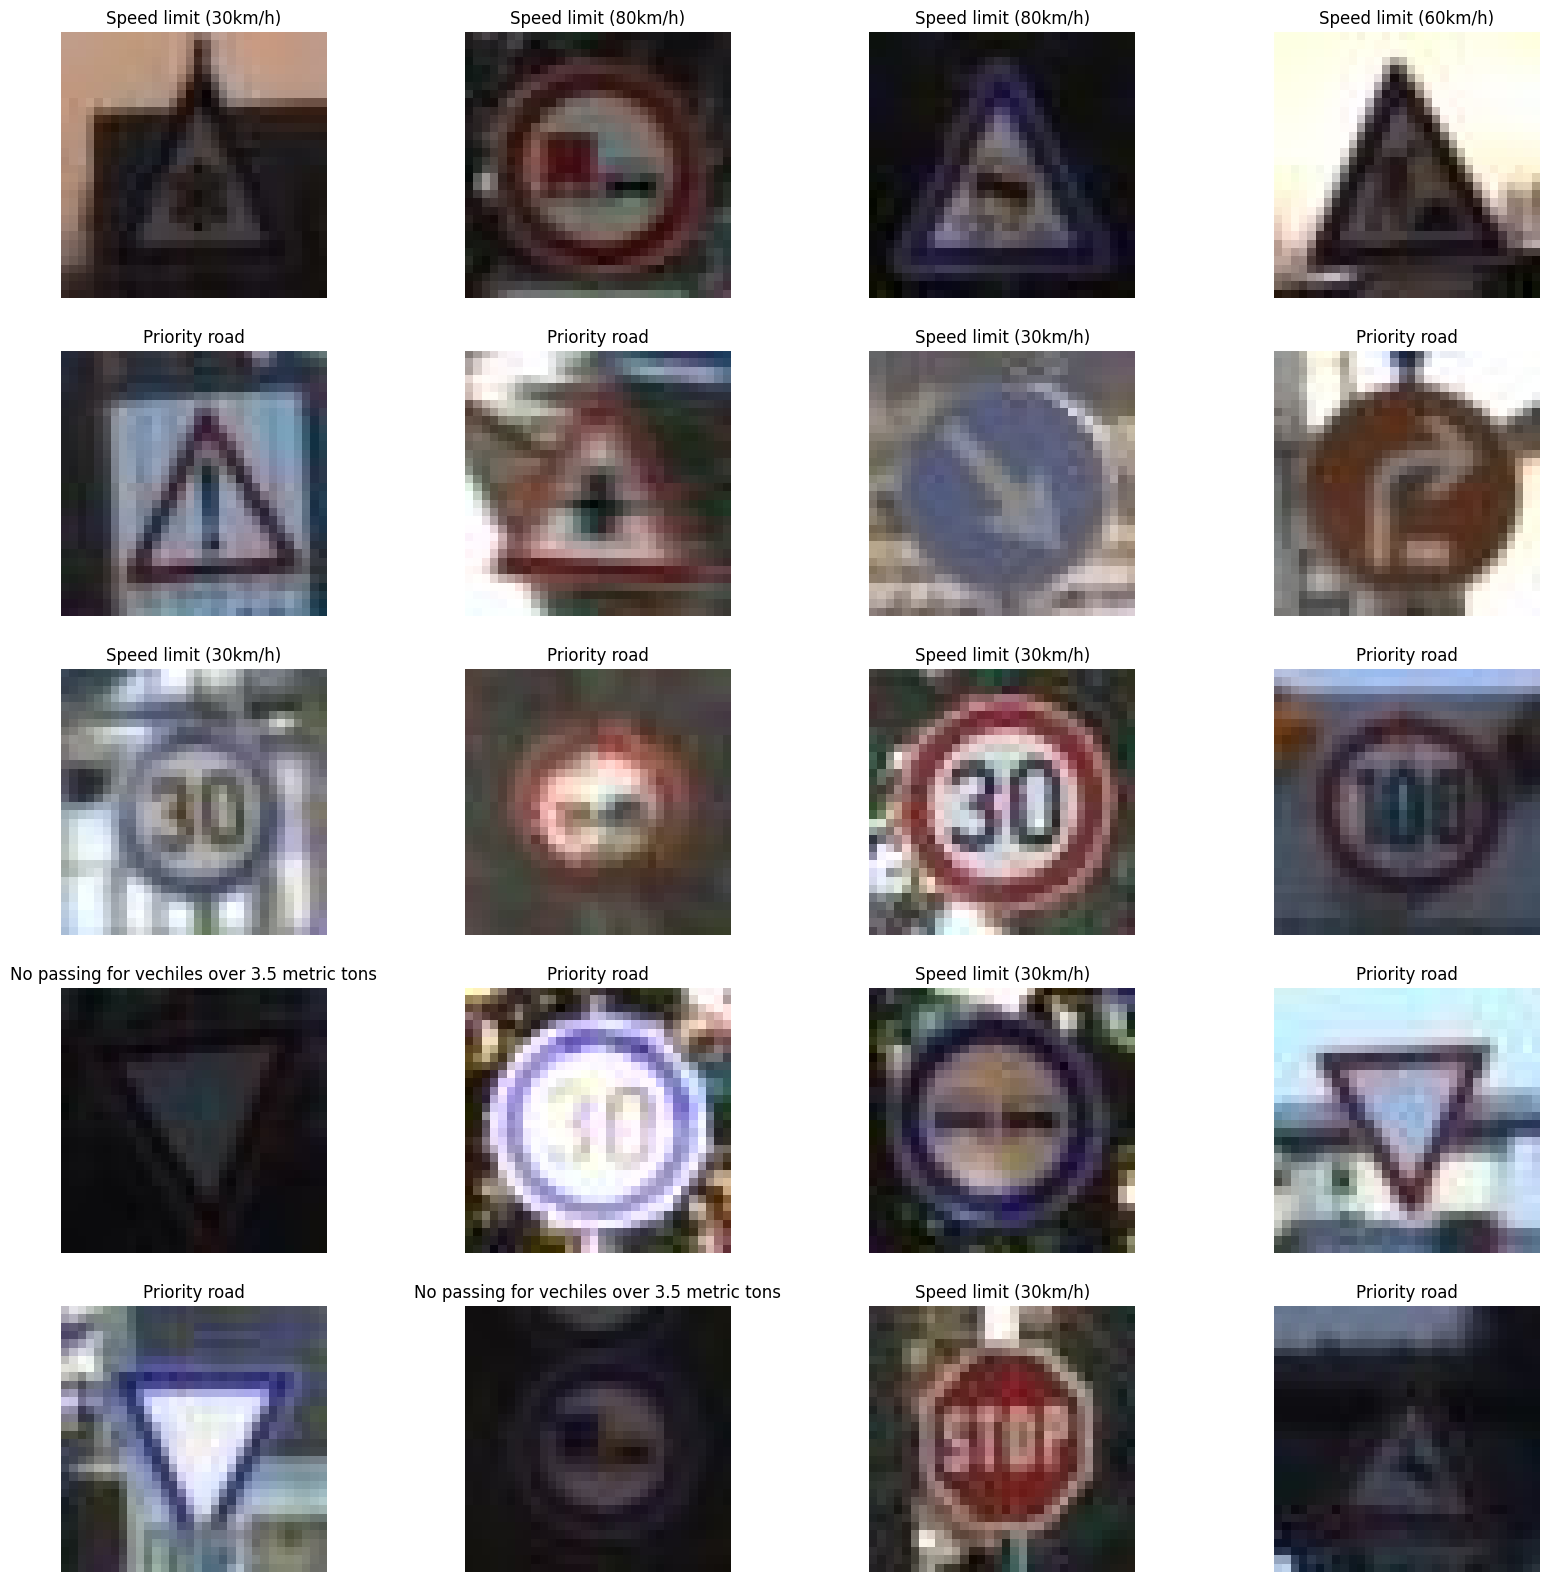

In [46]:
def plot_image(x_test,pred,actual, i,dic):
    image = plt.imshow(x_test[i])
    l=plt.title(dic[pred[i]])
    ax.grid(False)
    ax.axis('off')
    return image, l
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_image(x_test,pred2,actual, i,dic)

plt.show()

In [47]:
model2.save("resnet_traffic_sign.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
